# Projeto Bônus

A partir da adoção de um sistema de bandejas, será formulado um modelo cálculo para meta de recomendações semanais convertidas em vendas por uma equipe de baristas.

## Importando arquivos

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [14]:
!pip install openpyxl


[notice] A new release of pip is available: 23.3 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
df = pd.read_excel('Controle de bandejas.xlsx')
df

c:\Users\Gabriel\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
c:\Users\Gabriel\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


,Ano,Semana,"Ideal, valor",Meta ideal,Meta ajustada,"Semanal, valor","Recomendada, valor",vendas realizadas (bandejas),total de conversões,Equiv. product line,...,% valor ideal,var. % movimento,A$% (total -S),B$% (total -S),D$% (total-S),F$% (total -S),K$% (total -S),P$% (total-S),S$% (total -S),$% (Total-S)
0,2022,26,33.92,310,1185,8.862233,7.106237,396.368520,93,20.310909,...,0.261269,0.000000,0.021844,0.746230,0.000000,0.142865,0.059561,0.029500,0.054010,1.054010
1,2022,27,33.92,310,1184,8.872677,7.412368,986.444517,38,44.180579,...,0.261577,1.488706,0.018014,0.776228,0.001708,0.124981,0.045275,0.033794,0.046888,1.046888
2,2022,28,33.92,310,1189,8.836661,9.201605,857.375154,81,14.145614,...,0.260515,-0.130843,0.000000,0.806860,0.011273,0.105074,0.039504,0.037289,0.016776,1.016776
3,2022,29,33.92,310,1220,8.611724,8.835778,881.167437,90,33.442780,...,0.253883,0.027750,0.022437,0.752758,0.010623,0.147652,0.019410,0.047120,0.039450,1.039450
4,2022,30,33.92,310,1205,8.719288,9.886277,1013.036839,94,22.708276,...,0.257054,0.149653,0.021077,0.735729,0.047528,0.129547,0.031998,0.034121,0.022930,1.022930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,2023,48,48.89,215,920,11.423441,14.714601,744.054561,45,8.528027,...,0.233656,-0.139790,0.046934,0.615194,0.173113,0.102631,0.020787,0.041341,0.011594,1.011594
75,2023,49,48.89,215,930,11.293444,15.666122,778.068404,46,24.209066,...,0.230997,0.045714,0.044523,0.662169,0.137560,0.097376,0.014036,0.044336,0.032114,1.032114
76,2023,50,48.89,215,899,11.684642,14.741700,1041.330126,57,24.877099,...,0.238999,0.338353,0.035834,0.616002,0.151029,0.113227,0.050197,0.033709,0.024474,1.024474
77,2023,51,48.89,215,918,11.446303,14.663394,1079.941679,56,43.137945,...,0.234124,0.037079,0.027624,0.652459,0.136281,0.108861,0.034236,0.040539,0.041607,1.041607


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Ano                             79 non-null     int64  
 1   Semana                          79 non-null     int64  
 2   Ideal, valor                    79 non-null     float64
 3   Meta ideal                      79 non-null     int64  
 4   Meta ajustada                   79 non-null     int64  
 5   Semanal, valor                  79 non-null     float64
 6   Recomendada, valor              79 non-null     float64
 7   vendas realizadas (bandejas)    79 non-null     float64
 8   total de conversões             79 non-null     int64  
 9   Equiv. product line             79 non-null     float64
 10  Conversões + Equiv. Prod. Line  79 non-null     float64
 11  meta de conversões              79 non-null     float64
 12  Dif. Meta/conversões            79 non

## Análise Univariada

Não foi necessária análise de nulos, pois o dataframe foi construído sem nulos por este que vos fala.

In [17]:
df['vendas realizadas (bandejas)'] = df['vendas realizadas (bandejas)'].astype('int')
df

,Ano,Semana,"Ideal, valor",Meta ideal,Meta ajustada,"Semanal, valor","Recomendada, valor",vendas realizadas (bandejas),total de conversões,Equiv. product line,...,% valor ideal,var. % movimento,A$% (total -S),B$% (total -S),D$% (total-S),F$% (total -S),K$% (total -S),P$% (total-S),S$% (total -S),$% (Total-S)
0,2022,26,33.92,310,1185,8.862233,7.106237,396,93,20.310909,...,0.261269,0.000000,0.021844,0.746230,0.000000,0.142865,0.059561,0.029500,0.054010,1.054010
1,2022,27,33.92,310,1184,8.872677,7.412368,986,38,44.180579,...,0.261577,1.488706,0.018014,0.776228,0.001708,0.124981,0.045275,0.033794,0.046888,1.046888
2,2022,28,33.92,310,1189,8.836661,9.201605,857,81,14.145614,...,0.260515,-0.130843,0.000000,0.806860,0.011273,0.105074,0.039504,0.037289,0.016776,1.016776
3,2022,29,33.92,310,1220,8.611724,8.835778,881,90,33.442780,...,0.253883,0.027750,0.022437,0.752758,0.010623,0.147652,0.019410,0.047120,0.039450,1.039450
4,2022,30,33.92,310,1205,8.719288,9.886277,1013,94,22.708276,...,0.257054,0.149653,0.021077,0.735729,0.047528,0.129547,0.031998,0.034121,0.022930,1.022930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,2023,48,48.89,215,920,11.423441,14.714601,744,45,8.528027,...,0.233656,-0.139790,0.046934,0.615194,0.173113,0.102631,0.020787,0.041341,0.011594,1.011594
75,2023,49,48.89,215,930,11.293444,15.666122,778,46,24.209066,...,0.230997,0.045714,0.044523,0.662169,0.137560,0.097376,0.014036,0.044336,0.032114,1.032114
76,2023,50,48.89,215,899,11.684642,14.741700,1041,57,24.877099,...,0.238999,0.338353,0.035834,0.616002,0.151029,0.113227,0.050197,0.033709,0.024474,1.024474
77,2023,51,48.89,215,918,11.446303,14.663394,1079,56,43.137945,...,0.234124,0.037079,0.027624,0.652459,0.136281,0.108861,0.034236,0.040539,0.041607,1.041607


In [18]:
df.describe()

,Ano,Semana,"Ideal, valor",Meta ideal,Meta ajustada,"Semanal, valor","Recomendada, valor",vendas realizadas (bandejas),total de conversões,Equiv. product line,...,% valor ideal,var. % movimento,A$% (total -S),B$% (total -S),D$% (total-S),F$% (total -S),K$% (total -S),P$% (total-S),S$% (total -S),$% (Total-S)
count,79.000000,79.000000,79.000000,79.000000,79.00000,79.000000,79.000000,79.000000,79.000000,79.000000,...,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000
mean,2022.658228,30.772152,44.144810,244.721519,1042.35443,10.323412,13.054272,918.886076,50.886076,27.523164,...,0.234763,0.027540,0.025320,0.678116,0.110377,0.114756,0.027864,0.043566,0.031813,1.031813
std,0.477334,14.379427,3.898383,25.271823,87.50810,0.728234,2.313494,163.348612,22.156777,20.324610,...,0.016060,0.207395,0.009982,0.053744,0.054036,0.022148,0.011623,0.006213,0.023808,0.023808
min,2022.000000,1.000000,33.920000,215.000000,843.00000,8.611724,0.000000,396.000000,0.000000,0.000000,...,0.212955,-0.229839,0.000000,0.606496,0.000000,0.026484,0.012478,0.029500,0.000000,1.000000
25%,2022.000000,20.500000,41.340000,232.000000,1002.50000,9.882792,12.423794,811.500000,33.500000,13.182262,...,0.223137,-0.070026,0.019879,0.638349,0.047195,0.102307,0.020449,0.039644,0.014380,1.014380
50%,2023.000000,33.000000,45.300000,232.000000,1034.00000,10.226985,13.438333,928.000000,48.000000,23.863042,...,0.230783,0.000000,0.023196,0.658039,0.126544,0.115747,0.024841,0.043386,0.024139,1.024139
75%,2023.000000,42.500000,45.350000,259.000000,1069.00000,10.714502,14.235983,1030.000000,67.000000,39.281478,...,0.243772,0.073121,0.029177,0.724323,0.153270,0.127737,0.033748,0.047538,0.041898,1.041898
max,2023.000000,52.000000,48.890000,310.000000,1260.00000,12.459713,16.690074,1306.000000,119.000000,92.065858,...,0.301396,1.488706,0.052488,0.806860,0.180491,0.182273,0.077360,0.056307,0.118857,1.118857


In [19]:
df.boxplot('vendas realizadas (bandejas)',figsize= (8,8), fontsize='large');

In [20]:
df.boxplot('total de conversões',figsize= (8,8), fontsize='large');

### Criando marcação de data

Formato isocalendar: (YYYY,WW,D), onde o primeiro dia da semana é segunda, e o último é domingo. Como no BI a semana começa na segunda e termina no domingo, os dados de cada semana ficam acumulados para o domingo (i.e. weekday = 7).

É preciso criar uma coluna de data, formando a tupla isocalendar com a coluna ano, combinada com a coluna semana, combinada com o número 7 e aplicando a função date.fromisocalendar(year, week, day).

Primeiro será criada a coluna isoformat, depois a coluna data.

In [21]:
def create_date_from_year_week(year, week):
    """ creates timestamp object from year and week numbers, standardized day is Sunday"""
    return pd.Timestamp.fromisocalendar(year, week, 7)

In [22]:
create_date_from_year_week(2022, 32)

Timestamp('2022-08-14 00:00:00')

In [24]:
dataframe_copy = df.copy() #criando uma cópia para manipulação dos dados de análise
year = dataframe_copy['Ano']
week = dataframe_copy['Semana']
date_year_week = lambda x,y: create_date_from_year_week(x,y)
date = list(map(date_year_week, year, week))
dataframe_copy['date']= pd.Series(date)
dataframe_copy

,Ano,Semana,"Ideal, valor",Meta ideal,Meta ajustada,"Semanal, valor","Recomendada, valor",vendas realizadas (bandejas),total de conversões,Equiv. product line,...,var. % movimento,A$% (total -S),B$% (total -S),D$% (total-S),F$% (total -S),K$% (total -S),P$% (total-S),S$% (total -S),$% (Total-S),date
0,2022,26,33.92,310,1185,8.862233,7.106237,396,93,20.310909,...,0.000000,0.021844,0.746230,0.000000,0.142865,0.059561,0.029500,0.054010,1.054010,2022-07-03
1,2022,27,33.92,310,1184,8.872677,7.412368,986,38,44.180579,...,1.488706,0.018014,0.776228,0.001708,0.124981,0.045275,0.033794,0.046888,1.046888,2022-07-10
2,2022,28,33.92,310,1189,8.836661,9.201605,857,81,14.145614,...,-0.130843,0.000000,0.806860,0.011273,0.105074,0.039504,0.037289,0.016776,1.016776,2022-07-17
3,2022,29,33.92,310,1220,8.611724,8.835778,881,90,33.442780,...,0.027750,0.022437,0.752758,0.010623,0.147652,0.019410,0.047120,0.039450,1.039450,2022-07-24
4,2022,30,33.92,310,1205,8.719288,9.886277,1013,94,22.708276,...,0.149653,0.021077,0.735729,0.047528,0.129547,0.031998,0.034121,0.022930,1.022930,2022-07-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,2023,48,48.89,215,920,11.423441,14.714601,744,45,8.528027,...,-0.139790,0.046934,0.615194,0.173113,0.102631,0.020787,0.041341,0.011594,1.011594,2023-12-03
75,2023,49,48.89,215,930,11.293444,15.666122,778,46,24.209066,...,0.045714,0.044523,0.662169,0.137560,0.097376,0.014036,0.044336,0.032114,1.032114,2023-12-10
76,2023,50,48.89,215,899,11.684642,14.741700,1041,57,24.877099,...,0.338353,0.035834,0.616002,0.151029,0.113227,0.050197,0.033709,0.024474,1.024474,2023-12-17
77,2023,51,48.89,215,918,11.446303,14.663394,1079,56,43.137945,...,0.037079,0.027624,0.652459,0.136281,0.108861,0.034236,0.040539,0.041607,1.041607,2023-12-24


### Variação no tempo

In [25]:
dataframe_copy.plot.scatter(['date'], ['vendas realizadas (bandejas)'], figsize = (20, 10));

### Removendo outliers

In [26]:
mask_outliers = dataframe_copy['vendas realizadas (bandejas)'] == 396
dataframe_copy = dataframe_copy[~mask_outliers]
dataframe_copy

,Ano,Semana,"Ideal, valor",Meta ideal,Meta ajustada,"Semanal, valor","Recomendada, valor",vendas realizadas (bandejas),total de conversões,Equiv. product line,...,var. % movimento,A$% (total -S),B$% (total -S),D$% (total-S),F$% (total -S),K$% (total -S),P$% (total-S),S$% (total -S),$% (Total-S),date
1,2022,27,33.92,310,1184,8.872677,7.412368,986,38,44.180579,...,1.488706,0.018014,0.776228,0.001708,0.124981,0.045275,0.033794,0.046888,1.046888,2022-07-10
2,2022,28,33.92,310,1189,8.836661,9.201605,857,81,14.145614,...,-0.130843,0.000000,0.806860,0.011273,0.105074,0.039504,0.037289,0.016776,1.016776,2022-07-17
3,2022,29,33.92,310,1220,8.611724,8.835778,881,90,33.442780,...,0.027750,0.022437,0.752758,0.010623,0.147652,0.019410,0.047120,0.039450,1.039450,2022-07-24
4,2022,30,33.92,310,1205,8.719288,9.886277,1013,94,22.708276,...,0.149653,0.021077,0.735729,0.047528,0.129547,0.031998,0.034121,0.022930,1.022930,2022-07-31
5,2022,31,41.34,254,969,10.839958,10.653415,815,41,28.228892,...,-0.194779,0.021321,0.765057,0.008083,0.148838,0.023054,0.033647,0.035847,1.035847,2022-08-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,2023,48,48.89,215,920,11.423441,14.714601,744,45,8.528027,...,-0.139790,0.046934,0.615194,0.173113,0.102631,0.020787,0.041341,0.011594,1.011594,2023-12-03
75,2023,49,48.89,215,930,11.293444,15.666122,778,46,24.209066,...,0.045714,0.044523,0.662169,0.137560,0.097376,0.014036,0.044336,0.032114,1.032114,2023-12-10
76,2023,50,48.89,215,899,11.684642,14.741700,1041,57,24.877099,...,0.338353,0.035834,0.616002,0.151029,0.113227,0.050197,0.033709,0.024474,1.024474,2023-12-17
77,2023,51,48.89,215,918,11.446303,14.663394,1079,56,43.137945,...,0.037079,0.027624,0.652459,0.136281,0.108861,0.034236,0.040539,0.041607,1.041607,2023-12-24


In [27]:
dataframe_copy.plot.scatter(['date'], ['vendas realizadas (bandejas)'], figsize = (20, 10));

In [28]:
dataframe_copy.plot.scatter(['date'], ['total de conversões'], figsize = (20, 10), c='red');

## Análise bi-variada

Verificando correlações para modelagem dos estimadores

In [29]:
dataframe_copy.columns

Index(['Ano', 'Semana', 'Ideal, valor', 'Meta ideal', 'Meta ajustada',
       'Semanal, valor', 'Recomendada, valor', 'vendas realizadas (bandejas)',
       'total de conversões', 'Equiv. product line',
       'Conversões + Equiv. Prod. Line', 'meta de conversões',
       'Dif. Meta/conversões', 'eficiência de conversão', '% meta de vendas',
       '% valor ideal', 'var. % movimento', 'A$%  (total -S)',
       'B$%  (total -S)', 'D$% (total-S)', 'F$%  (total -S)',
       'K$%  (total -S)', 'P$%  (total-S)', 'S$%  (total -S)', '$%  (Total-S)',
       'date'],
      dtype='object')

In [30]:
df_correlacao = dataframe_copy.drop(labels=['Ano', 'Semana', 'date', 'Equiv. product line', 'Meta ajustada', 'Dif. Meta/conversões', 'eficiência de conversão', '% valor ideal', 'meta de conversões', 'eficiência de conversão', '% meta de vendas',
       '% valor ideal', 'Conversões + Equiv. Prod. Line', 'var. % movimento', 'S$%  (total -S)', '$%  (Total-S)'], axis=1) #essas colunas ou são derivadas de outras, ou não são relevantes para uma análise de correlação (e.g. tempo), ou não farão mais parte do cálculo do bônus (product line)
df_correlacao

,"Ideal, valor",Meta ideal,"Semanal, valor","Recomendada, valor",vendas realizadas (bandejas),total de conversões,A$% (total -S),B$% (total -S),D$% (total-S),F$% (total -S),K$% (total -S),P$% (total-S)
1,33.92,310,8.872677,7.412368,986,38,0.018014,0.776228,0.001708,0.124981,0.045275,0.033794
2,33.92,310,8.836661,9.201605,857,81,0.000000,0.806860,0.011273,0.105074,0.039504,0.037289
3,33.92,310,8.611724,8.835778,881,90,0.022437,0.752758,0.010623,0.147652,0.019410,0.047120
4,33.92,310,8.719288,9.886277,1013,94,0.021077,0.735729,0.047528,0.129547,0.031998,0.034121
5,41.34,254,10.839958,10.653415,815,41,0.021321,0.765057,0.008083,0.148838,0.023054,0.033647
...,...,...,...,...,...,...,...,...,...,...,...,...
74,48.89,215,11.423441,14.714601,744,45,0.046934,0.615194,0.173113,0.102631,0.020787,0.041341
75,48.89,215,11.293444,15.666122,778,46,0.044523,0.662169,0.137560,0.097376,0.014036,0.044336
76,48.89,215,11.684642,14.741700,1041,57,0.035834,0.616002,0.151029,0.113227,0.050197,0.033709
77,48.89,215,11.446303,14.663394,1079,56,0.027624,0.652459,0.136281,0.108861,0.034236,0.040539


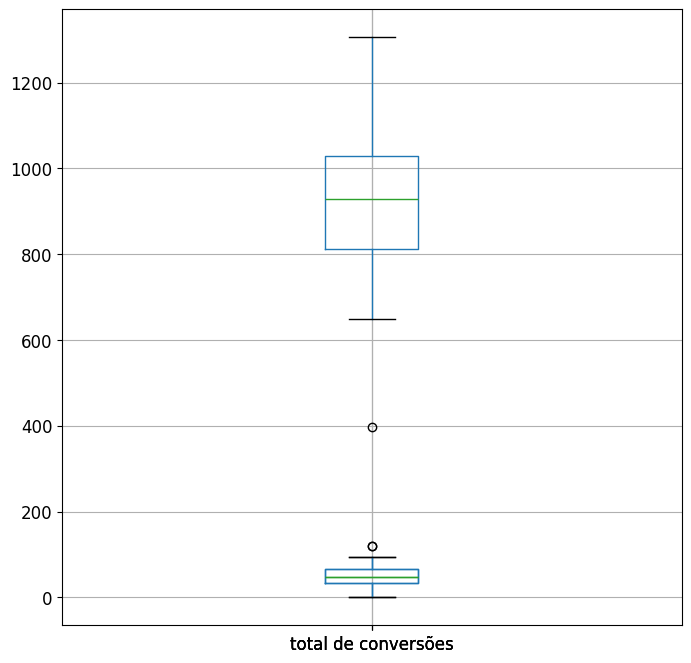

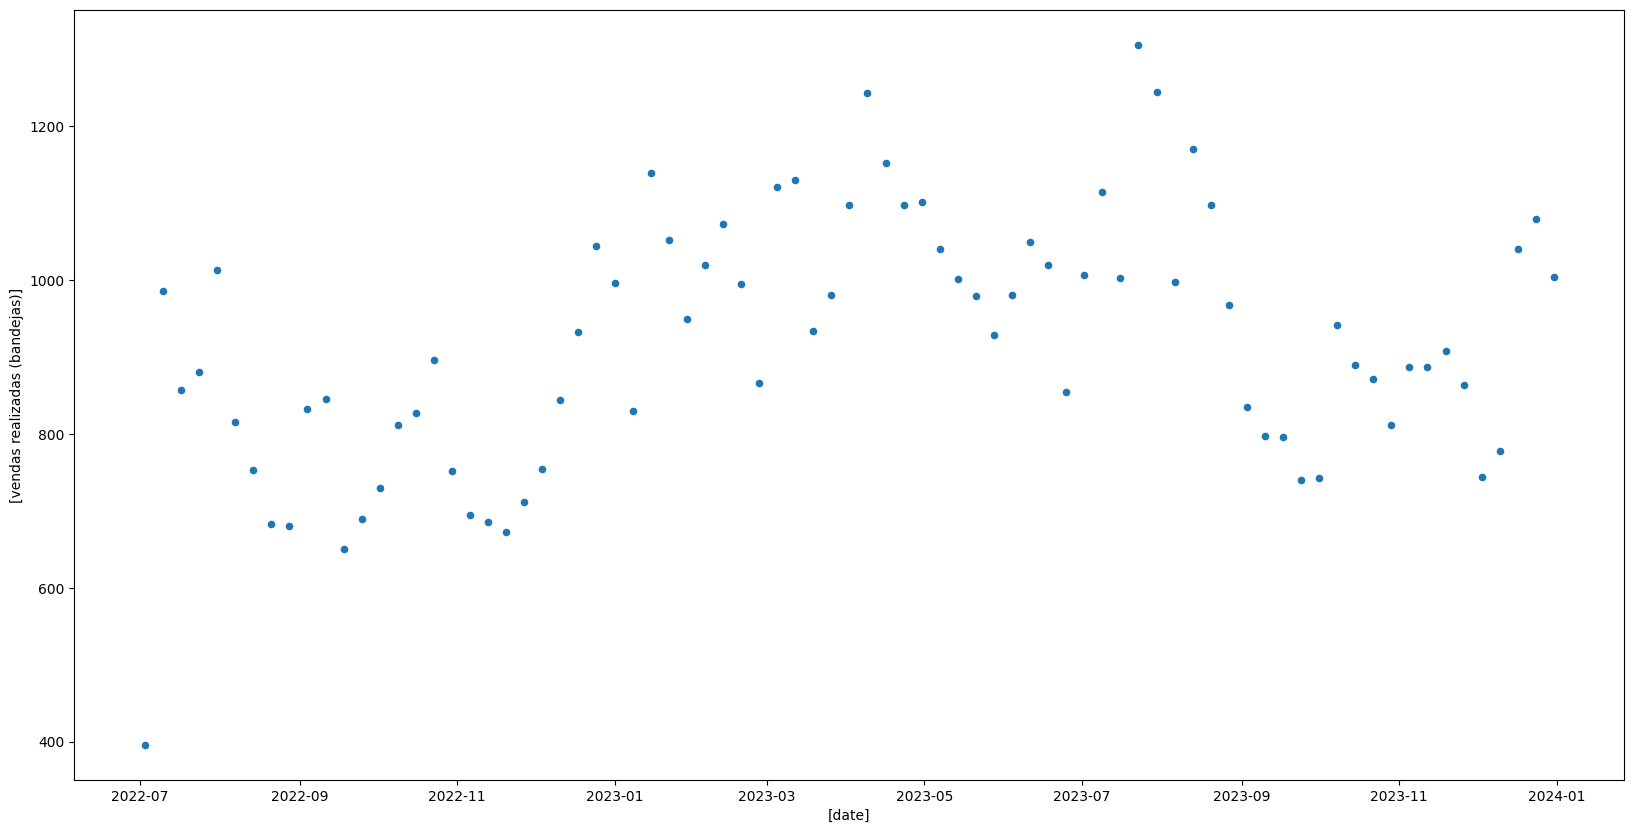

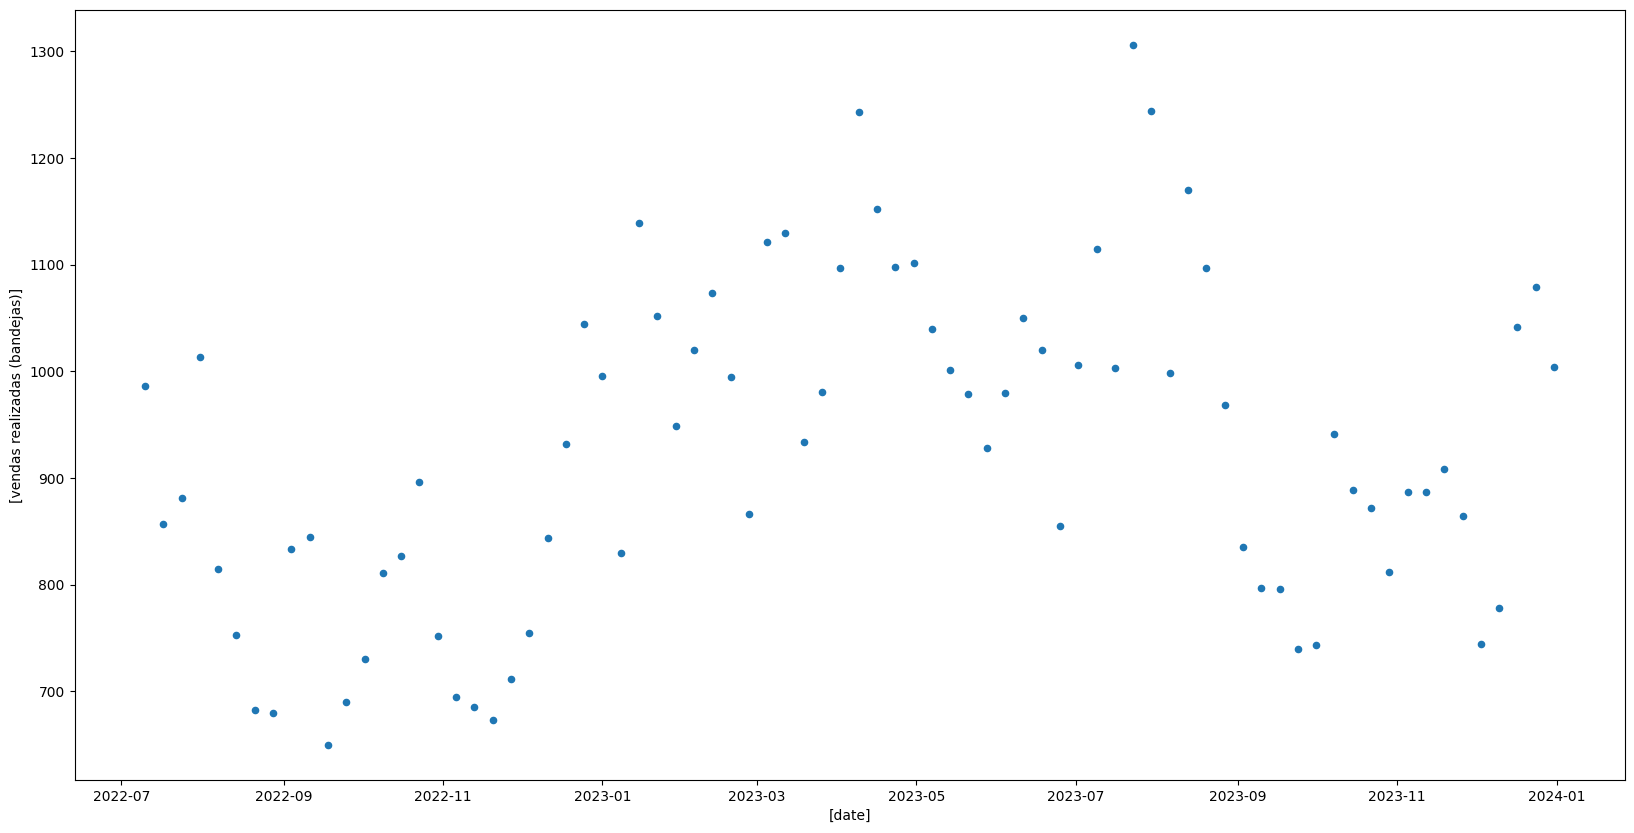

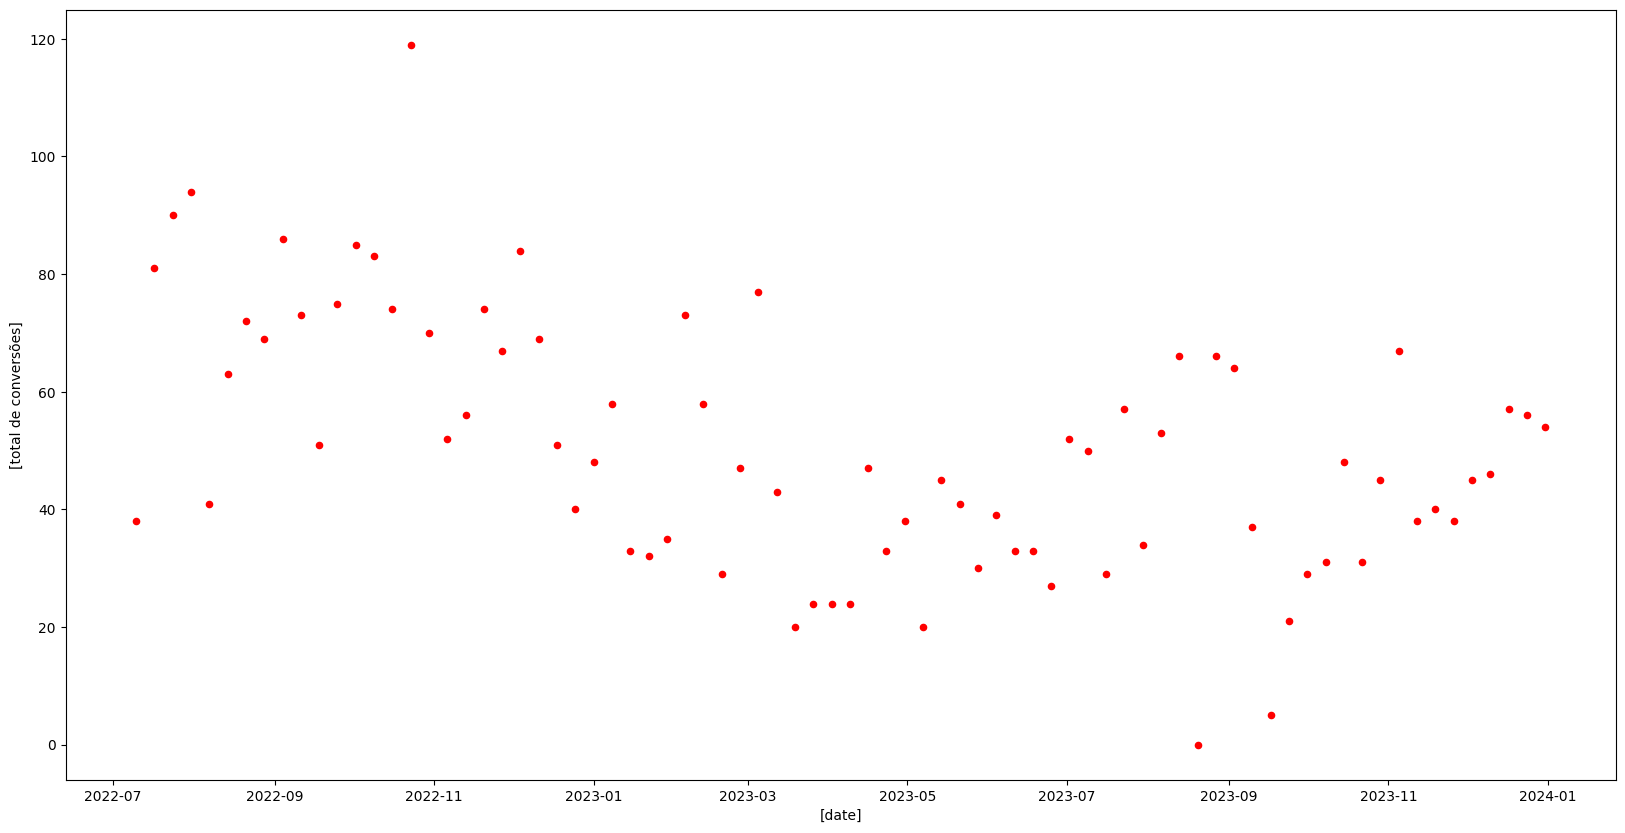

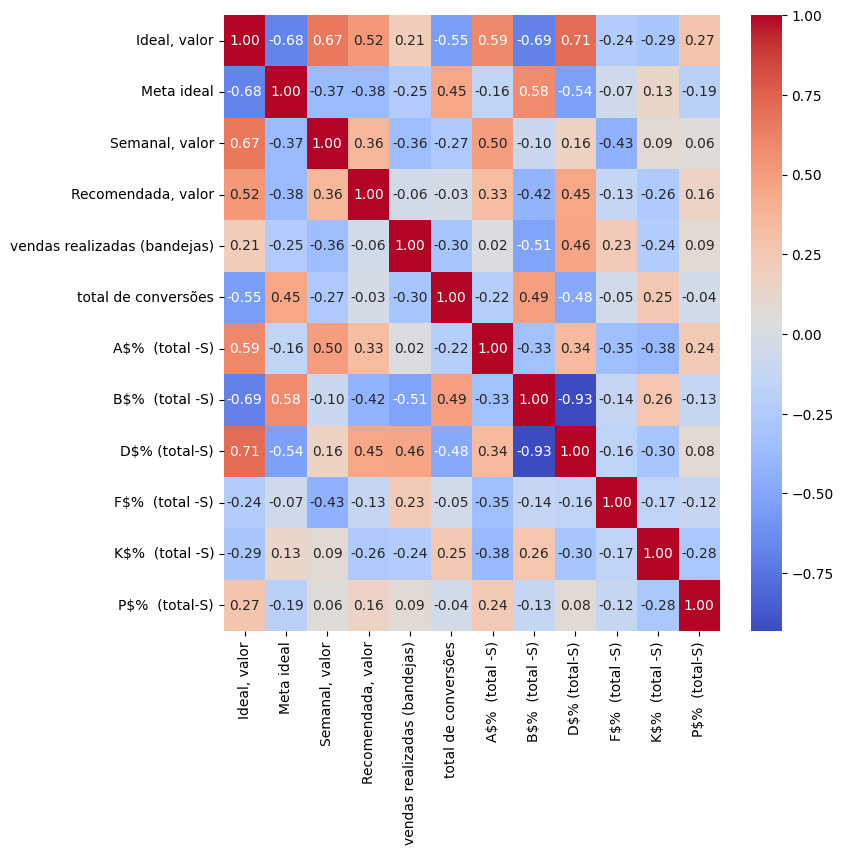

In [31]:
from matplotlib.colors import ListedColormap
corr_matrix = df_correlacao.corr(method = 'pearson') # Matriz de correlação
plt.figure(figsize=(8,8)) # Dimensionamento da figura
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt = '.2f') # Mapa de calor + Matriz
plt.show()

Correlações muito fracas com total de conversão:

- P
- F
- Recomendada, valor

Correlações fracas com total de conversão:

- A
- K
- Semanal, valor

Correlações moderadas com total de conversão:

- Ideal, valor
- Meta, ideal
- vendas realizadas;
- B;
- D;

In [32]:
df_correlacao.columns

Index(['Ideal, valor', 'Meta ideal', 'Semanal, valor', 'Recomendada, valor',
       'vendas realizadas (bandejas)', 'total de conversões',
       'A$%  (total -S)', 'B$%  (total -S)', 'D$% (total-S)',
       'F$%  (total -S)', 'K$%  (total -S)', 'P$%  (total-S)'],
      dtype='object')

In [33]:
rotulos = df_correlacao['total de conversões'].to_frame()
atributos_moderados_e_fracos = df_correlacao.drop(labels = ['total de conversões', 'P$%  (total-S)', 'F$%  (total -S)', 'Recomendada, valor'], axis=1)
atributos_moderados = atributos_moderados_e_fracos.drop(labels = ['A$%  (total -S)', 'K$%  (total -S)', 'Semanal, valor'], axis = 1)

In [34]:
atributos_moderados_e_fracos

,"Ideal, valor",Meta ideal,"Semanal, valor",vendas realizadas (bandejas),A$% (total -S),B$% (total -S),D$% (total-S),K$% (total -S)
1,33.92,310,8.872677,986,0.018014,0.776228,0.001708,0.045275
2,33.92,310,8.836661,857,0.000000,0.806860,0.011273,0.039504
3,33.92,310,8.611724,881,0.022437,0.752758,0.010623,0.019410
4,33.92,310,8.719288,1013,0.021077,0.735729,0.047528,0.031998
5,41.34,254,10.839958,815,0.021321,0.765057,0.008083,0.023054
...,...,...,...,...,...,...,...,...
74,48.89,215,11.423441,744,0.046934,0.615194,0.173113,0.020787
75,48.89,215,11.293444,778,0.044523,0.662169,0.137560,0.014036
76,48.89,215,11.684642,1041,0.035834,0.616002,0.151029,0.050197
77,48.89,215,11.446303,1079,0.027624,0.652459,0.136281,0.034236


In [35]:
atributos_moderados_e_fracos.columns

Index(['Ideal, valor', 'Meta ideal', 'Semanal, valor',
       'vendas realizadas (bandejas)', 'A$%  (total -S)', 'B$%  (total -S)',
       'D$% (total-S)', 'K$%  (total -S)'],
      dtype='object')

In [36]:
atributos_moderados

,"Ideal, valor",Meta ideal,vendas realizadas (bandejas),B$% (total -S),D$% (total-S)
1,33.92,310,986,0.776228,0.001708
2,33.92,310,857,0.806860,0.011273
3,33.92,310,881,0.752758,0.010623
4,33.92,310,1013,0.735729,0.047528
5,41.34,254,815,0.765057,0.008083
...,...,...,...,...,...
74,48.89,215,744,0.615194,0.173113
75,48.89,215,778,0.662169,0.137560
76,48.89,215,1041,0.616002,0.151029
77,48.89,215,1079,0.652459,0.136281


In [37]:
atributos_moderados.columns

Index(['Ideal, valor', 'Meta ideal', 'vendas realizadas (bandejas)',
       'B$%  (total -S)', 'D$% (total-S)'],
      dtype='object')

In [38]:
rotulos

,total de conversões
1,38
2,81
3,90
4,94
5,41
...,...
74,45
75,46
76,57
77,56


## Modelagem

Modelo = transformador + estimador. Os transformadores personalizados serão aplicados ao data frame usando-se o FunctionTransformer, para que:

1. Eles sejam incluídos no Pipeline do ScikitLearn (o tratamento de dados seja automatizado sempre, a partir do data frame original);
3. Evitar rodar o mesmo código duas vezes (uma para treinamento, outra para teste);

In [39]:
df #a única modificação feita ao df original foi a tipagem da coluna de vendas realizadas (de float para int)

,Ano,Semana,"Ideal, valor",Meta ideal,Meta ajustada,"Semanal, valor","Recomendada, valor",vendas realizadas (bandejas),total de conversões,Equiv. product line,...,% valor ideal,var. % movimento,A$% (total -S),B$% (total -S),D$% (total-S),F$% (total -S),K$% (total -S),P$% (total-S),S$% (total -S),$% (Total-S)
0,2022,26,33.92,310,1185,8.862233,7.106237,396,93,20.310909,...,0.261269,0.000000,0.021844,0.746230,0.000000,0.142865,0.059561,0.029500,0.054010,1.054010
1,2022,27,33.92,310,1184,8.872677,7.412368,986,38,44.180579,...,0.261577,1.488706,0.018014,0.776228,0.001708,0.124981,0.045275,0.033794,0.046888,1.046888
2,2022,28,33.92,310,1189,8.836661,9.201605,857,81,14.145614,...,0.260515,-0.130843,0.000000,0.806860,0.011273,0.105074,0.039504,0.037289,0.016776,1.016776
3,2022,29,33.92,310,1220,8.611724,8.835778,881,90,33.442780,...,0.253883,0.027750,0.022437,0.752758,0.010623,0.147652,0.019410,0.047120,0.039450,1.039450
4,2022,30,33.92,310,1205,8.719288,9.886277,1013,94,22.708276,...,0.257054,0.149653,0.021077,0.735729,0.047528,0.129547,0.031998,0.034121,0.022930,1.022930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,2023,48,48.89,215,920,11.423441,14.714601,744,45,8.528027,...,0.233656,-0.139790,0.046934,0.615194,0.173113,0.102631,0.020787,0.041341,0.011594,1.011594
75,2023,49,48.89,215,930,11.293444,15.666122,778,46,24.209066,...,0.230997,0.045714,0.044523,0.662169,0.137560,0.097376,0.014036,0.044336,0.032114,1.032114
76,2023,50,48.89,215,899,11.684642,14.741700,1041,57,24.877099,...,0.238999,0.338353,0.035834,0.616002,0.151029,0.113227,0.050197,0.033709,0.024474,1.024474
77,2023,51,48.89,215,918,11.446303,14.663394,1079,56,43.137945,...,0.234124,0.037079,0.027624,0.652459,0.136281,0.108861,0.034236,0.040539,0.041607,1.041607


### Criando funções transformadoras

In [40]:
def create_new_fields(df):
    dataset = df.copy()
    year = dataset['Ano']
    week = dataset['Semana']
    date_year_week = lambda x,y: create_date_from_year_week(x,y)
    date = list(map(date_year_week, year, week))
    dataset['date']= pd.Series(date)
    return dataset

def remove_outliers(df):
    dataset = df.copy()
    mask_outliers = dataset['vendas realizadas (bandejas)'] == 396
    dataset = dataset[~mask_outliers]
    return dataset

def select_labels(df):
    global rotulos_regressao
    dataset = df.copy()
    rotulos_regressao = dataset['total de conversões'].to_frame()
    return dataset

def select_moderate_and_weak_atributes(df, filter = False):
    dataset = df.copy()
    if filter:
        columns = ['Ideal, valor', 'Meta ideal', 'Semanal, valor', 'vendas realizadas (bandejas)', 'A$%  (total -S)', 'B$%  (total -S)', 'D$% (total-S)', 'K$%  (total -S)']
        return dataset[columns]
    else:
        return dataset.drop('total de conversões', axis = 'columns', errors = 'ignore')
    
def select_moderate_atributes(df, filter = False):
    dataset = df.copy()
    if filter:
        columns = ['Ideal, valor', 'Meta ideal', 'vendas realizadas (bandejas)', 'B$%  (total -S)', 'D$% (total-S)']
        return dataset[columns]
    else:
        return dataset.drop('total de conversões', axis = 'columns', errors = 'ignore')

In [41]:
from sklearn.preprocessing import FunctionTransformer
criar_novos_campos = FunctionTransformer(create_new_fields)
remocao_outliers = FunctionTransformer(remove_outliers)
selecionar_rotulos = FunctionTransformer(select_labels)
selecionar_atributos_moderados_e_fracos = FunctionTransformer(select_moderate_and_weak_atributes, kw_args={'filter': True})
selecionar_atributos_moderados = FunctionTransformer(select_moderate_atributes, kw_args={'filter': True})

### Criando os transformadores

In [42]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler

transformador_moderados_e_fracos = Pipeline([
    ('criar novos campos', criar_novos_campos),
    ('remover outliers', remocao_outliers),
    ('selecionar rotulos', selecionar_rotulos),
    ('selecionar moderados e fracos', selecionar_atributos_moderados_e_fracos),
    ('normalizar os dados', RobustScaler())
])

transformador_moderados_somente = Pipeline([
    ('criar novos campos', criar_novos_campos),
    ('remover outliers', remocao_outliers),
    ('selecionar rotulos', selecionar_rotulos),
    ('selecionar moderados e fracos', selecionar_atributos_moderados),
    ('normalizar os dados', RobustScaler())
])


In [43]:
transformador_moderados_e_fracos.fit_transform(df)

array([[-2.83790524e+00,  2.88888889e+00, -1.64519873e+00,
         2.51968504e-01, -5.63730281e-01,  1.57370928e+00,
        -1.35097654e+00,  1.55024919e+00],
       [-2.83790524e+00,  2.88888889e+00, -1.68861229e+00,
        -3.28458943e-01, -2.48724858e+00,  1.97668344e+00,
        -1.24780113e+00,  1.11249522e+00],
       [-2.83790524e+00,  2.88888889e+00, -1.95975505e+00,
        -2.20472441e-01, -9.14343687e-02,  1.26496148e+00,
        -1.25481678e+00, -4.11746864e-01],
       [-2.83790524e+00,  2.88888889e+00, -1.83009602e+00,
         3.73453318e-01, -2.36664573e-01,  1.04094261e+00,
        -8.56735522e-01,  5.43095304e-01],
       [-9.87531172e-01,  8.14814815e-01,  7.26191758e-01,
        -5.17435321e-01, -2.10666998e-01,  1.42675267e+00,
        -1.28221133e+00, -1.35305996e-01],
       [-9.87531172e-01,  8.14814815e-01,  5.11222966e-01,
        -7.96400450e-01,  6.63247982e-01,  1.18580597e+00,
        -1.12128405e+00,  6.98008225e-01],
       [-9.87531172e-01,  8.148148

### Importando os estimadores e criando o fluxo final

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

#Regressão com atributos moderados e fracos
regressao_atr_mod_fraco = Pipeline([
    ('transformer', transformador_moderados_e_fracos),
    ('Regressão linear atr. moderados e fracos', LinearRegression())
])

svr_polynomial_mod_fraco = Pipeline([
    ('transformer', transformador_moderados_e_fracos),
    ('SVR Polinomial atr. moderados e fracos', SVR(kernel='poly', degree = 3))
])

arvore_decisao_atr_mod_fraco = Pipeline([
    ('transformer', transformador_moderados_e_fracos),
    ('Árvore atr. moderados e fracos', DecisionTreeRegressor(max_depth=3))
])

floresta_atr_mod_fraco = Pipeline([
    ('transformer', transformador_moderados_e_fracos),
    ('Floresta atr. moderados e fracos', RandomForestRegressor())
])

modelos_atr_mod_e_fracos = [
    regressao_atr_mod_fraco,
    svr_polynomial_mod_fraco,
    arvore_decisao_atr_mod_fraco,
    floresta_atr_mod_fraco
]

#Regressão somente com atributos de corerlação moderada
regressao_only_mod = Pipeline([
    ('transformer', transformador_moderados_somente),
    ('Reg. lin. só atr. mod', LinearRegression())
])

svr_polynomial_only_mod = Pipeline([
    ('transformer', transformador_moderados_somente),
    ('SVR pol. só atr. mod.', SVR(kernel='poly', degree = 3))
])

arvore_decisao_only_mod= Pipeline([
    ('transformer', transformador_moderados_somente),
    ('Árvore só atr. mod.', DecisionTreeRegressor(max_depth=3))
])

floresta_only_mod = Pipeline([
    ('transformer', transformador_moderados_somente),
    ('Floresta só atr. mod.', RandomForestRegressor())
])

modelos_only_mod = [
    regressao_only_mod,
    svr_polynomial_only_mod,
    arvore_decisao_only_mod,
    floresta_only_mod
]


### Train, test, validation splits

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

In [46]:
rotulos_regressao

,total de conversões
1,38
2,81
3,90
4,94
5,41
...,...
74,45
75,46
76,57
77,56


In [47]:
df

,Ano,Semana,"Ideal, valor",Meta ideal,Meta ajustada,"Semanal, valor","Recomendada, valor",vendas realizadas (bandejas),total de conversões,Equiv. product line,...,% valor ideal,var. % movimento,A$% (total -S),B$% (total -S),D$% (total-S),F$% (total -S),K$% (total -S),P$% (total-S),S$% (total -S),$% (Total-S)
0,2022,26,33.92,310,1185,8.862233,7.106237,396,93,20.310909,...,0.261269,0.000000,0.021844,0.746230,0.000000,0.142865,0.059561,0.029500,0.054010,1.054010
1,2022,27,33.92,310,1184,8.872677,7.412368,986,38,44.180579,...,0.261577,1.488706,0.018014,0.776228,0.001708,0.124981,0.045275,0.033794,0.046888,1.046888
2,2022,28,33.92,310,1189,8.836661,9.201605,857,81,14.145614,...,0.260515,-0.130843,0.000000,0.806860,0.011273,0.105074,0.039504,0.037289,0.016776,1.016776
3,2022,29,33.92,310,1220,8.611724,8.835778,881,90,33.442780,...,0.253883,0.027750,0.022437,0.752758,0.010623,0.147652,0.019410,0.047120,0.039450,1.039450
4,2022,30,33.92,310,1205,8.719288,9.886277,1013,94,22.708276,...,0.257054,0.149653,0.021077,0.735729,0.047528,0.129547,0.031998,0.034121,0.022930,1.022930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,2023,48,48.89,215,920,11.423441,14.714601,744,45,8.528027,...,0.233656,-0.139790,0.046934,0.615194,0.173113,0.102631,0.020787,0.041341,0.011594,1.011594
75,2023,49,48.89,215,930,11.293444,15.666122,778,46,24.209066,...,0.230997,0.045714,0.044523,0.662169,0.137560,0.097376,0.014036,0.044336,0.032114,1.032114
76,2023,50,48.89,215,899,11.684642,14.741700,1041,57,24.877099,...,0.238999,0.338353,0.035834,0.616002,0.151029,0.113227,0.050197,0.033709,0.024474,1.024474
77,2023,51,48.89,215,918,11.446303,14.663394,1079,56,43.137945,...,0.234124,0.037079,0.027624,0.652459,0.136281,0.108861,0.034236,0.040539,0.041607,1.041607


In [48]:
X_train, X_test, Y_train, Y_test = train_test_split(remove_outliers(df), rotulos_regressao, test_size=0.2, random_state=0)
x_train, x_valid, y_train, y_valid = train_test_split(X_train, Y_train, test_size=0.1, random_state=0)
#X_train_only_mod, X_test_only_mod, y_train, y_test = train_test_split(atributos_moderados, rotulos, test_size=0.2, random_state=0)

In [49]:
X_train

,Ano,Semana,"Ideal, valor",Meta ideal,Meta ajustada,"Semanal, valor","Recomendada, valor",vendas realizadas (bandejas),total de conversões,Equiv. product line,...,% valor ideal,var. % movimento,A$% (total -S),B$% (total -S),D$% (total-S),F$% (total -S),K$% (total -S),P$% (total-S),S$% (total -S),$% (Total-S)
4,2022,30,33.92,310,1205,8.719288,9.886277,1013,94,22.708276,...,0.257054,0.149653,0.021077,0.735729,0.047528,0.129547,0.031998,0.034121,0.022930,1.022930
23,2022,49,40.58,259,1069,9.830712,13.701739,844,69,15.156583,...,0.242255,0.117442,0.014540,0.642465,0.156417,0.116922,0.033593,0.036064,0.018282,1.018282
8,2022,34,41.34,254,999,10.520093,11.958696,680,69,38.877984,...,0.254477,-0.000106,0.021764,0.751338,0.027391,0.136746,0.021868,0.040893,0.060555,1.060555
27,2023,1,45.30,232,1060,9.911663,13.190345,830,58,15.973102,...,0.218801,-0.166615,0.023524,0.686798,0.131331,0.084707,0.024890,0.048750,0.019602,1.019602
43,2023,17,45.30,232,1077,9.753013,12.273421,1101,38,83.768981,...,0.215298,0.002859,0.027037,0.619053,0.155306,0.121544,0.025780,0.051279,0.082295,1.082295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,2023,49,48.89,215,930,11.293444,15.666122,778,46,24.209066,...,0.230997,0.045714,0.044523,0.662169,0.137560,0.097376,0.014036,0.044336,0.032114,1.032114
68,2023,42,48.89,287,1248,11.221235,13.777216,872,31,2.495269,...,0.229520,-0.019471,0.034807,0.682038,0.135985,0.081806,0.020793,0.044571,0.002869,1.002869
65,2023,39,48.89,215,916,11.464339,14.698408,743,29,0.000000,...,0.234493,0.005021,0.020542,0.649097,0.125122,0.124364,0.029507,0.051369,0.000000,1.000000
48,2023,22,45.35,232,981,10.709343,13.716667,980,39,39.684973,...,0.236149,0.055615,0.023862,0.681804,0.099909,0.115747,0.036047,0.042631,0.042189,1.042189


In [50]:
Y_train.shape

(62, 1)

### Metrics

In [51]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse

## Treinamento

In [52]:
from time import time

resultados_mod_e_fracos = {
    'nome': [],
    'tempo': [],
    'RMSE_Treino': [],
    'MAE_Treino': []
}
for modelo in modelos_atr_mod_e_fracos:
    print()
    start = time()
    #treino
    nome = modelo.steps[-1][0] #nome do modelo
    print(f'Nome: {nome}')
    resultados_mod_e_fracos['nome'].append(nome)

    modelo.fit(X_train, np.ravel(Y_train)) #treinamento
    predicao = modelo.predict(X_train) #previsão
    metrica = mse(Y_train, predicao, squared=False)
    resultados_mod_e_fracos['RMSE_Treino'].append(metrica)
    print(f'RMSE: {metrica}')

    metrica = mae(Y_train, predicao)
    resultados_mod_e_fracos['MAE_Treino'].append(metrica)
    print(f'MAE: {metrica}')

    stop = time()
    tempo = stop - start #cronômetro
    resultados_mod_e_fracos['tempo'].append(tempo)
    print(f'Tempo Treinamento: {tempo}')


Nome: Regressão linear atr. moderados e fracos
RMSE: 16.4097386156852
MAE: 12.143645415210795
Tempo Treinamento: 0.02599310874938965

Nome: SVR Polinomial atr. moderados e fracos
RMSE: 19.673884210010886
MAE: 15.183598545768252
Tempo Treinamento: 0.013026714324951172

Nome: Árvore atr. moderados e fracos
RMSE: 12.488928660765984
MAE: 9.046370967741936
Tempo Treinamento: 0.015000343322753906

Nome: Floresta atr. moderados e fracos
RMSE: 6.8406777866411135
MAE: 5.095322580645162
Tempo Treinamento: 0.24174809455871582


In [53]:
resultados_mod_e_fracos = pd.DataFrame(resultados_mod_e_fracos)
resultados_mod_e_fracos

,nome,tempo,RMSE_Treino,MAE_Treino
0,Regressão linear atr. moderados e fracos,0.025993,16.409739,12.143645
1,SVR Polinomial atr. moderados e fracos,0.013027,19.673884,15.183599
2,Árvore atr. moderados e fracos,0.015000,12.488929,9.046371
3,Floresta atr. moderados e fracos,0.241748,6.840678,5.095323


In [54]:
resultados_mod_e_fracos.sort_values(by='RMSE_Treino')

,nome,tempo,RMSE_Treino,MAE_Treino
3,Floresta atr. moderados e fracos,0.241748,6.840678,5.095323
2,Árvore atr. moderados e fracos,0.015000,12.488929,9.046371
0,Regressão linear atr. moderados e fracos,0.025993,16.409739,12.143645
1,SVR Polinomial atr. moderados e fracos,0.013027,19.673884,15.183599


In [55]:
resultados_only_mod = {
    'nome': [],
    'tempo': [],
    'RMSE_Treino': [],
    'MAE_Treino': []
}
for modelo in modelos_only_mod:
    print()
    start = time()
    #treino
    nome = modelo.steps[-1][0] #nome do modelo
    print(f'Nome: {nome}')
    resultados_only_mod['nome'].append(nome)

    modelo.fit(X_train, np.ravel(Y_train)) #treinamento
    predicao = modelo.predict(X_train) #previsão
    metrica = mse(Y_train, predicao, squared=False)
    resultados_only_mod['RMSE_Treino'].append(metrica)
    print(f'RMSE: {metrica}')

    metrica = mae(Y_train, predicao)
    resultados_only_mod['MAE_Treino'].append(metrica)
    print(f'MAE: {metrica}')

    stop = time()
    tempo = stop - start #cronômetro
    resultados_only_mod['tempo'].append(tempo)
    print(f'Tempo Treinamento: {tempo}')


Nome: Reg. lin. só atr. mod
RMSE: 16.647158504467107
MAE: 12.642081351188516
Tempo Treinamento: 0.01602482795715332

Nome: SVR pol. só atr. mod.
RMSE: 19.775303831412923
MAE: 15.327366155613067
Tempo Treinamento: 0.012975931167602539

Nome: Árvore só atr. mod.
RMSE: 13.070364411616548
MAE: 9.618969581967683
Tempo Treinamento: 0.014000415802001953

Nome: Floresta só atr. mod.
RMSE: 7.164482738008781
MAE: 5.66225806451613
Tempo Treinamento: 0.21660327911376953


In [56]:
resultados_only_mod = pd.DataFrame(resultados_only_mod)
resultados_only_mod

,nome,tempo,RMSE_Treino,MAE_Treino
0,Reg. lin. só atr. mod,0.016025,16.647159,12.642081
1,SVR pol. só atr. mod.,0.012976,19.775304,15.327366
2,Árvore só atr. mod.,0.014000,13.070364,9.618970
3,Floresta só atr. mod.,0.216603,7.164483,5.662258


In [57]:
resultados_only_mod.sort_values(by='RMSE_Treino')

,nome,tempo,RMSE_Treino,MAE_Treino
3,Floresta só atr. mod.,0.216603,7.164483,5.662258
2,Árvore só atr. mod.,0.014000,13.070364,9.618970
0,Reg. lin. só atr. mod,0.016025,16.647159,12.642081
1,SVR pol. só atr. mod.,0.012976,19.775304,15.327366


## Teste

In [58]:
resultados_teste_mod_e_fracos = {
    'nome': [],
    'tempo': [],
    'RMSE_Treino': [],
    'MAE_Treino': []
}
for modelo in modelos_atr_mod_e_fracos:
    print()
    start = time()
    # Teste
    nome = modelo.steps[-1][0] #nome do modelo
    print(f'Nome: {nome}')
    resultados_teste_mod_e_fracos['nome'].append(nome)

    #modelo.fit(X_train, Y_train) #NÃO SE TREINA MODELO PARA O TESTE
    predicao = modelo.predict(X_test) #previsão
    metrica = mse(Y_test, predicao, squared=False)
    resultados_teste_mod_e_fracos['RMSE_Treino'].append(metrica)
    print(f'RMSE: {metrica}')

    metrica = mae(Y_test, predicao)
    resultados_teste_mod_e_fracos['MAE_Treino'].append(metrica)
    print(f'MAE: {metrica}')

    stop = time()
    tempo = stop - start #cronômetro
    resultados_teste_mod_e_fracos['tempo'].append(tempo)
    print(f'Tempo Treinamento: {tempo}')


Nome: Regressão linear atr. moderados e fracos
RMSE: 20.681202907175333
MAE: 16.42573623342039
Tempo Treinamento: 0.007993221282958984

Nome: SVR Polinomial atr. moderados e fracos
RMSE: 20.197901851976038
MAE: 16.468012958792382
Tempo Treinamento: 0.006000995635986328

Nome: Árvore atr. moderados e fracos
RMSE: 26.119921199090783
MAE: 20.53571428571429
Tempo Treinamento: 0.009021520614624023

Nome: Floresta atr. moderados e fracos
RMSE: 22.368964130017286
MAE: 18.048125
Tempo Treinamento: 0.008985042572021484


In [59]:
resultados_teste_mod_e_fracos = pd.DataFrame(resultados_teste_mod_e_fracos)
resultados_teste_mod_e_fracos

,nome,tempo,RMSE_Treino,MAE_Treino
0,Regressão linear atr. moderados e fracos,0.007993,20.681203,16.425736
1,SVR Polinomial atr. moderados e fracos,0.006001,20.197902,16.468013
2,Árvore atr. moderados e fracos,0.009022,26.119921,20.535714
3,Floresta atr. moderados e fracos,0.008985,22.368964,18.048125


In [60]:
resultados_teste_mod_e_fracos.sort_values(by='RMSE_Treino')

,nome,tempo,RMSE_Treino,MAE_Treino
1,SVR Polinomial atr. moderados e fracos,0.006001,20.197902,16.468013
0,Regressão linear atr. moderados e fracos,0.007993,20.681203,16.425736
3,Floresta atr. moderados e fracos,0.008985,22.368964,18.048125
2,Árvore atr. moderados e fracos,0.009022,26.119921,20.535714


## Cross Validation

### Single model

In [61]:
from numpy import mean
from numpy import absolute
from numpy import sqrt

In [79]:
#define predictor and response variables: X_Train, Y_train

#define cross validation method to use
from sklearn.model_selection import ShuffleSplit

shuffle = ShuffleSplit(n_splits=500, test_size=0.15)



In [80]:
#build regression model
modelo = regressao_only_mod

from sklearn.model_selection import cross_validate

#use shufflesplit to evaluate model
cv_results = cross_validate(modelo, X_train, Y_train, scoring=('neg_root_mean_squared_error', 'neg_mean_absolute_error'), cv=shuffle, n_jobs=-1)

#get columns names
cv_results = pd.DataFrame(cv_results) 
cv_results.columns


Index(['fit_time', 'score_time', 'test_neg_root_mean_squared_error',
       'test_neg_mean_absolute_error'],
      dtype='object')

In [81]:
#consolidate results
cv_results['total_time'] = cv_results['fit_time'] + cv_results['score_time']
Total_time = sum(cv_results['total_time'])


In [82]:

#calculate metrics
RMSE = mean(absolute(cv_results['test_neg_root_mean_squared_error']))
MAE = mean(absolute(cv_results['test_neg_mean_absolute_error']))

Total_time, RMSE, MAE

(15.075185298919678, 17.79771600818512, 14.051125113487757)

### All models

In [83]:
resultados_cross_only_mod = {
    'nome': [],
    'tempo': [],
    'RMSE_Cross': [],
    'MAE_Cross': []
}

for modelo in modelos_only_mod:
    print()
    # Teste
    nome = modelo.steps[-1][0] #nome do modelo
    print(f'Nome: {nome}')
    resultados_cross_only_mod['nome'].append(nome)
    
    #this step does model fitting & testing in accordance to cross validation procedure
    cv_results = cross_validate(modelo, X_train, Y_train, scoring=('neg_root_mean_squared_error', 'neg_mean_absolute_error'), cv=shuffle, n_jobs=-1)
    
    #consolidate results
    cv_results['total_time'] = cv_results['fit_time'] + cv_results['score_time']
    Total_time = sum(cv_results['total_time'])
    
    #calculate metrics
    RMSE = mean(absolute(cv_results['test_neg_root_mean_squared_error']))
    MAE = mean(absolute(cv_results['test_neg_mean_absolute_error']))

    resultados_cross_only_mod['RMSE_Cross'].append(RMSE)
    print(f'RMSE: {RMSE}')
    
    resultados_cross_only_mod['MAE_Cross'].append(MAE)
    print(f'MAE: {MAE}')

    resultados_cross_only_mod['tempo'].append(Total_time)
    print(f'Tempo Treinamento: {Total_time}')


Nome: Reg. lin. só atr. mod


RMSE: 17.908890158968717
MAE: 14.255052934077352
Tempo Treinamento: 15.284390449523926

Nome: SVR pol. só atr. mod.
RMSE: 21.95335522355592
MAE: 17.767754700658497
Tempo Treinamento: 19.069189310073853

Nome: Árvore só atr. mod.
RMSE: 20.60598766980086
MAE: 16.31627680218514
Tempo Treinamento: 15.92401385307312

Nome: Floresta só atr. mod.
RMSE: 18.05000789768877
MAE: 14.558288000000001
Tempo Treinamento: 191.03641819953918


In [84]:
resultados_cross_only_mod = pd.DataFrame(resultados_cross_only_mod)
resultados_cross_only_mod

,nome,tempo,RMSE_Cross,MAE_Cross
0,Reg. lin. só atr. mod,15.284390,17.908890,14.255053
1,SVR pol. só atr. mod.,19.069189,21.953355,17.767755
2,Árvore só atr. mod.,15.924014,20.605988,16.316277
3,Floresta só atr. mod.,191.036418,18.050008,14.558288


In [85]:
resultados_cross_only_mod.sort_values(by='RMSE_Cross')

,nome,tempo,RMSE_Cross,MAE_Cross
0,Reg. lin. só atr. mod,15.284390,17.908890,14.255053
3,Floresta só atr. mod.,191.036418,18.050008,14.558288
2,Árvore só atr. mod.,15.924014,20.605988,16.316277
1,SVR pol. só atr. mod.,19.069189,21.953355,17.767755


In [86]:
resultados_cross_mod_e_fraco = {
    'nome': [],
    'tempo': [],
    'RMSE_Cross': [],
    'MAE_Cross': []
}

for modelo in modelos_atr_mod_e_fracos:
    print()
    # Teste
    nome = modelo.steps[-1][0] #nome do modelo
    print(f'Nome: {nome}')
    resultados_cross_mod_e_fraco['nome'].append(nome)
    
    #this step does model fitting & testing in accordance to cross validation procedure
    cv_results = cross_validate(modelo, X_train, Y_train, scoring=('neg_root_mean_squared_error', 'neg_mean_absolute_error'), cv=shuffle, n_jobs=-1)
    
    #consolidate results
    cv_results['total_time'] = cv_results['fit_time'] + cv_results['score_time']
    Total_time = sum(cv_results['total_time'])
    
    #calculate metrics
    RMSE = mean(absolute(cv_results['test_neg_root_mean_squared_error']))
    MAE = mean(absolute(cv_results['test_neg_mean_absolute_error']))

    resultados_cross_mod_e_fraco['RMSE_Cross'].append(RMSE)
    print(f'RMSE: {RMSE}')
    
    resultados_cross_mod_e_fraco['MAE_Cross'].append(MAE)
    print(f'MAE: {MAE}')

    resultados_cross_mod_e_fraco['tempo'].append(Total_time)
    print(f'Tempo Treinamento: {Total_time}')


Nome: Regressão linear atr. moderados e fracos


RMSE: 19.654612952680687
MAE: 14.970865578079426
Tempo Treinamento: 15.500164270401001

Nome: SVR Polinomial atr. moderados e fracos
RMSE: 21.81229748767429
MAE: 17.613548255336173
Tempo Treinamento: 20.578310251235962

Nome: Árvore atr. moderados e fracos
RMSE: 21.27600795067314
MAE: 16.858169899162064
Tempo Treinamento: 17.17948031425476

Nome: Floresta atr. moderados e fracos
RMSE: 16.96225140848825
MAE: 13.368937999999998
Tempo Treinamento: 170.210431098938


In [87]:
resultados_cross_mod_e_fraco = pd.DataFrame(resultados_cross_mod_e_fraco)
resultados_cross_mod_e_fraco

,nome,tempo,RMSE_Cross,MAE_Cross
0,Regressão linear atr. moderados e fracos,15.500164,19.654613,14.970866
1,SVR Polinomial atr. moderados e fracos,20.578310,21.812297,17.613548
2,Árvore atr. moderados e fracos,17.179480,21.276008,16.858170
3,Floresta atr. moderados e fracos,170.210431,16.962251,13.368938


In [88]:
resultados_cross_mod_e_fraco.sort_values(by='RMSE_Cross')

,nome,tempo,RMSE_Cross,MAE_Cross
3,Floresta atr. moderados e fracos,170.210431,16.962251,13.368938
0,Regressão linear atr. moderados e fracos,15.500164,19.654613,14.970866
2,Árvore atr. moderados e fracos,17.179480,21.276008,16.858170
1,SVR Polinomial atr. moderados e fracos,20.578310,21.812297,17.613548


In [89]:
test_df_copy = df.copy()
test_df_copy = remove_outliers(test_df_copy)
test_df_copy

,Ano,Semana,"Ideal, valor",Meta ideal,Meta ajustada,"Semanal, valor","Recomendada, valor",vendas realizadas (bandejas),total de conversões,Equiv. product line,...,% valor ideal,var. % movimento,A$% (total -S),B$% (total -S),D$% (total-S),F$% (total -S),K$% (total -S),P$% (total-S),S$% (total -S),$% (Total-S)
1,2022,27,33.92,310,1184,8.872677,7.412368,986,38,44.180579,...,0.261577,1.488706,0.018014,0.776228,0.001708,0.124981,0.045275,0.033794,0.046888,1.046888
2,2022,28,33.92,310,1189,8.836661,9.201605,857,81,14.145614,...,0.260515,-0.130843,0.000000,0.806860,0.011273,0.105074,0.039504,0.037289,0.016776,1.016776
3,2022,29,33.92,310,1220,8.611724,8.835778,881,90,33.442780,...,0.253883,0.027750,0.022437,0.752758,0.010623,0.147652,0.019410,0.047120,0.039450,1.039450
4,2022,30,33.92,310,1205,8.719288,9.886277,1013,94,22.708276,...,0.257054,0.149653,0.021077,0.735729,0.047528,0.129547,0.031998,0.034121,0.022930,1.022930
5,2022,31,41.34,254,969,10.839958,10.653415,815,41,28.228892,...,0.262215,-0.194779,0.021321,0.765057,0.008083,0.148838,0.023054,0.033647,0.035847,1.035847
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,2023,48,48.89,215,920,11.423441,14.714601,744,45,8.528027,...,0.233656,-0.139790,0.046934,0.615194,0.173113,0.102631,0.020787,0.041341,0.011594,1.011594
75,2023,49,48.89,215,930,11.293444,15.666122,778,46,24.209066,...,0.230997,0.045714,0.044523,0.662169,0.137560,0.097376,0.014036,0.044336,0.032114,1.032114
76,2023,50,48.89,215,899,11.684642,14.741700,1041,57,24.877099,...,0.238999,0.338353,0.035834,0.616002,0.151029,0.113227,0.050197,0.033709,0.024474,1.024474
77,2023,51,48.89,215,918,11.446303,14.663394,1079,56,43.137945,...,0.234124,0.037079,0.027624,0.652459,0.136281,0.108861,0.034236,0.040539,0.041607,1.041607


In [90]:
resultados_teste_df = {
    'nome': [],
    'tempo': [],
    'RMSE_Treino': [],
    'MAE_Treino': []
}
for modelo in modelos_atr_mod_e_fracos:
    print()
    start = time()
    # Teste
    nome = modelo.steps[-1][0] #nome do modelo
    print(f'Nome: {nome}')
    resultados_teste_df['nome'].append(nome)

    #NÃO SE TREINA MODELO PARA O TESTE
    predicao = modelo.predict(test_df_copy) #previsão
    metrica = mse(test_df_copy['total de conversões'], predicao, squared=False)
    resultados_teste_df['RMSE_Treino'].append(metrica)
    print(f'RMSE: {metrica}')

    metrica = mae(test_df_copy['total de conversões'], predicao)
    resultados_teste_df['MAE_Treino'].append(metrica)
    print(f'MAE: {metrica}')

    stop = time()
    tempo = stop - start #cronômetro
    resultados_teste_df['tempo'].append(tempo)
    print(f'Tempo Treinamento: {tempo}')


Nome: Regressão linear atr. moderados e fracos
RMSE: 17.371773741412607
MAE: 13.022023018946095
Tempo Treinamento: 0.007999658584594727

Nome: SVR Polinomial atr. moderados e fracos
RMSE: 19.78250666686181
MAE: 15.447068168952688
Tempo Treinamento: 0.009002923965454102

Nome: Árvore atr. moderados e fracos
RMSE: 16.24584821082578
MAE: 11.403159340659341
Tempo Treinamento: 0.006999492645263672

Nome: Floresta atr. moderados e fracos
RMSE: 11.82522889679259
MAE: 7.752307692307691
Tempo Treinamento: 0.01500082015991211


In [91]:
resultados_teste_df = pd.DataFrame(resultados_teste_df)
resultados_teste_df

,nome,tempo,RMSE_Treino,MAE_Treino
0,Regressão linear atr. moderados e fracos,0.008000,17.371774,13.022023
1,SVR Polinomial atr. moderados e fracos,0.009003,19.782507,15.447068
2,Árvore atr. moderados e fracos,0.006999,16.245848,11.403159
3,Floresta atr. moderados e fracos,0.015001,11.825229,7.752308


In [92]:
resultados_teste_df.sort_values(by='RMSE_Treino')

,nome,tempo,RMSE_Treino,MAE_Treino
3,Floresta atr. moderados e fracos,0.015001,11.825229,7.752308
2,Árvore atr. moderados e fracos,0.006999,16.245848,11.403159
0,Regressão linear atr. moderados e fracos,0.008000,17.371774,13.022023
1,SVR Polinomial atr. moderados e fracos,0.009003,19.782507,15.447068


In [93]:
predicao_floresta = floresta_atr_mod_fraco.predict(test_df_copy)
predicao_floresta

array([54.64, 71.74, 64.49, 82.18, 51.92, 66.34, 72.56, 64.83, 79.58,
       70.34, 58.92, 70.01, 82.36, 80.66, 74.25, 95.68, 68.51, 57.36,
       61.9 , 76.01, 63.99, 74.76, 70.36, 55.  , 49.86, 56.46, 50.26,
       44.82, 33.91, 35.19, 36.94, 50.49, 33.52, 43.24, 39.89, 41.72,
       24.13, 25.76, 28.03, 27.28, 32.31, 35.9 , 38.32, 28.21, 43.5 ,
       33.71, 33.34, 40.  , 30.14, 37.35, 31.53, 49.51, 44.55, 33.7 ,
       50.89, 37.28, 33.68, 29.29, 15.63, 55.31, 47.71, 37.73, 41.01,
       38.07, 32.05, 35.14, 45.36, 35.76, 45.82, 37.3 , 38.68, 40.07,
       38.03, 41.69, 44.23, 50.72, 46.73, 49.86])

In [94]:
test_df_copy['predicao floresta'] = predicao_floresta
test_df_copy

,Ano,Semana,"Ideal, valor",Meta ideal,Meta ajustada,"Semanal, valor","Recomendada, valor",vendas realizadas (bandejas),total de conversões,Equiv. product line,...,var. % movimento,A$% (total -S),B$% (total -S),D$% (total-S),F$% (total -S),K$% (total -S),P$% (total-S),S$% (total -S),$% (Total-S),predicao floresta
1,2022,27,33.92,310,1184,8.872677,7.412368,986,38,44.180579,...,1.488706,0.018014,0.776228,0.001708,0.124981,0.045275,0.033794,0.046888,1.046888,54.64
2,2022,28,33.92,310,1189,8.836661,9.201605,857,81,14.145614,...,-0.130843,0.000000,0.806860,0.011273,0.105074,0.039504,0.037289,0.016776,1.016776,71.74
3,2022,29,33.92,310,1220,8.611724,8.835778,881,90,33.442780,...,0.027750,0.022437,0.752758,0.010623,0.147652,0.019410,0.047120,0.039450,1.039450,64.49
4,2022,30,33.92,310,1205,8.719288,9.886277,1013,94,22.708276,...,0.149653,0.021077,0.735729,0.047528,0.129547,0.031998,0.034121,0.022930,1.022930,82.18
5,2022,31,41.34,254,969,10.839958,10.653415,815,41,28.228892,...,-0.194779,0.021321,0.765057,0.008083,0.148838,0.023054,0.033647,0.035847,1.035847,51.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,2023,48,48.89,215,920,11.423441,14.714601,744,45,8.528027,...,-0.139790,0.046934,0.615194,0.173113,0.102631,0.020787,0.041341,0.011594,1.011594,41.69
75,2023,49,48.89,215,930,11.293444,15.666122,778,46,24.209066,...,0.045714,0.044523,0.662169,0.137560,0.097376,0.014036,0.044336,0.032114,1.032114,44.23
76,2023,50,48.89,215,899,11.684642,14.741700,1041,57,24.877099,...,0.338353,0.035834,0.616002,0.151029,0.113227,0.050197,0.033709,0.024474,1.024474,50.72
77,2023,51,48.89,215,918,11.446303,14.663394,1079,56,43.137945,...,0.037079,0.027624,0.652459,0.136281,0.108861,0.034236,0.040539,0.041607,1.041607,46.73


In [95]:
pd.DataFrame.to_csv(test_df_copy, 'previsao_floresta.csv', sep =';', decimal = ',')